In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as metrics

# machine learning
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import preprocessing

In [2]:
# import file
df=pd.read_csv('country_data.csv')
# details of rows and column
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
#missing value
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
# Data Exploration
# statistical summary

In [6]:

df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [7]:
#Adjusting percentages
df['exports']=df['exports']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


In [8]:
df.tail(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
157,United Arab Emirates,8.6,27195.00,1281.000,22260.00,57600,12.50,76.5,1.87,35000
158,United Kingdom,5.2,10969.80,3749.960,11981.20,36200,1.57,80.3,1.92,38900
159,United States,7.3,6001.60,8663.600,7647.20,49400,1.22,78.7,1.93,48400
160,Uruguay,10.6,3129.70,993.650,3022.60,17100,4.91,76.4,2.08,11900
161,Uzbekistan,36.3,437.46,80.178,393.30,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.604,1050.62,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.858,450.64,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,540.20,85.994,451.14,3280,14.00,52.0,5.40,1460


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
#fig = plt.figure(figsize = (12,8))
#sns.boxplot(data = Df)
#plt.show()

In [11]:
#checking for outlier

#Q1 = Df.quantile(0.25)
#Q3 = Df.quantile(0.75)
#IQR = Q3 - Q1

#Df = Df[~((Df < (Q1 - 1.5 * IQR)) | (Df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
# showing correlation between the features
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

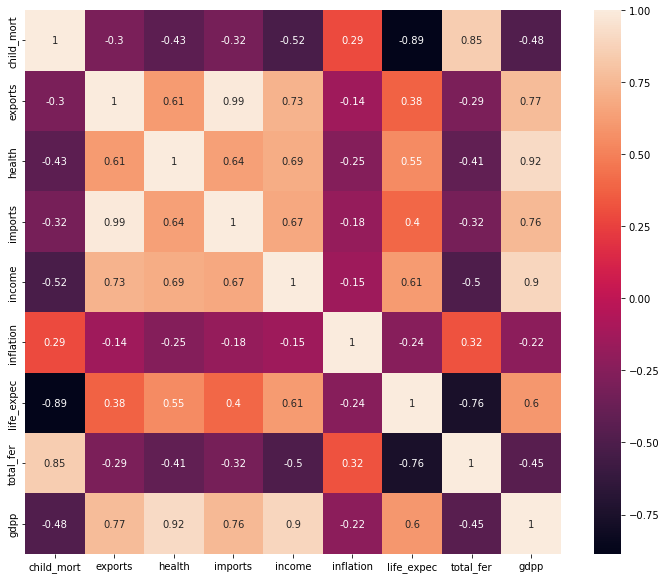

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
#From the correlation it shows that exports,health,import and export are highly correlated with gdpp. 

In [15]:
df.values

array([['Afghanistan', 90.2, 55.3, ..., 56.2, 5.82, 553],
       ['Albania', 16.6, 1145.2, ..., 76.3, 1.65, 4090],
       ['Algeria', 27.3, 1712.64, ..., 76.5, 2.89, 4460],
       ...,
       ['Vietnam', 23.3, 943.2, ..., 73.1, 1.95, 1310],
       ['Yemen', 56.3, 393.0, ..., 67.5, 4.67, 1310],
       ['Zambia', 83.1, 540.2, ..., 52.0, 5.4, 1460]], dtype=object)

In [16]:
df1 = df.drop("country", axis='columns')
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [17]:
#dataset clustering
distortions= []
K = range(1, 10)
#set k number of cluster for range in K
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df1)
#adding inertia_ to list
    distortions.append(kmeanModel.inertia_)

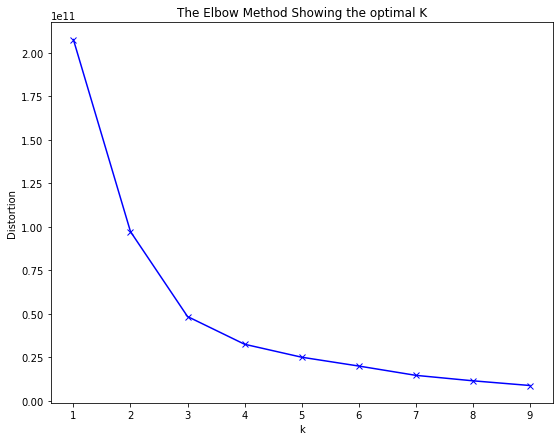

In [18]:
#visualizing
plt.figure(figsize = (9,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the optimal K')
plt.show()

In [19]:
#find out number of clusters
kmeans = KMeans(n_clusters = 3)

In [20]:
X1= Three_features= df[['exports', 'gdpp', 'imports']]
X1

,exports,gdpp,imports
0,55.30,553,248.297
1,1145.20,4090,1987.740
2,1712.64,4460,1400.440
3,2199.19,3530,1514.370
4,5551.00,12200,7185.800
...,...,...,...
162,1384.02,2970,1565.190
163,3847.50,13500,2376.000
164,943.20,1310,1050.620
165,393.00,1310,450.640


In [21]:
X1.shape

(167, 3)

In [22]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X1)
standard_df = pd.DataFrame(standard_df, columns =['exports', 'gdpp', 'imports'])

In [23]:
#data X(K algolrithm)
kmeans.fit(standard_df)

KMeans(n_clusters=3)

In [24]:
#predict
y_kmeans = kmeans.predict(standard_df)

In [25]:
y_kmeans.shape

(167,)

In [26]:
centers = kmeans.cluster_centers_

print(centers)

[[-0.27679723 -0.41336673 -0.27858721]
 [ 0.7937176   1.70140357  0.79627387]
 [ 7.31330621  3.43858583  7.39795921]]


In [27]:
y_kmeans in kmeans.labels_

True

In [28]:
df['cluster_country'] = y_kmeans

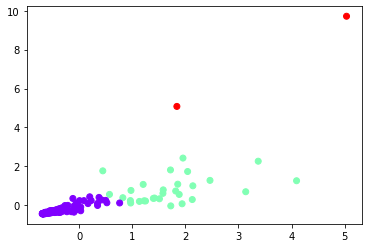

In [29]:
 plt.scatter(standard_df['gdpp'], standard_df['imports'], c=df['cluster_country'],cmap= 'rainbow')

In [30]:
u_labels = np.unique(y_kmeans)

In [31]:
np.unique(y_kmeans)

array([0, 1, 2], dtype=int32)

In [32]:
for i in u_labels:
    print(i)

0
1
2


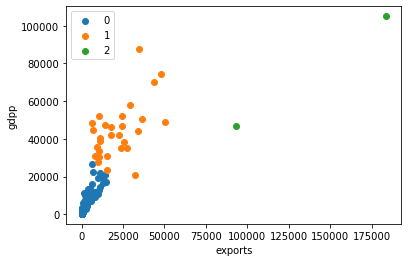

In [33]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X1.iloc[y_kmeans == i , 0] , X1.iloc[y_kmeans == i , 1], label = i)
plt.xlabel('exports')
plt.ylabel('gdpp')
plt.legend()
plt.show('cluster.png')

In [34]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans)
 
#plotting the results:
#for i in u_labels:
    #plt.scatter(X2.iloc[y_kmeans == i , 0] , X.iloc[y_kmeans == i , 2],  label = i)
#plt.xlabel('imports')
#plt.ylabel('gdpp')
#plt.legend()
#plt.show()

In [35]:
np.unique(y_kmeans)

array([0, 1, 2], dtype=int32)

In [36]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [37]:
X1['country_clusters']=y_kmeans

/var/folders/vk/88yqcc115qj_9db2kfg_fqhr0000gn/T/ipykernel_5560/650927623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['country_clusters']=y_kmeans


In [38]:
X1.head()

,exports,gdpp,imports,country_clusters
0,55.30,553,248.297,0
1,1145.20,4090,1987.740,0
2,1712.64,4460,1400.440,0
3,2199.19,3530,1514.370,0
4,5551.00,12200,7185.800,0


In [39]:
X1['c'] = df.country

/var/folders/vk/88yqcc115qj_9db2kfg_fqhr0000gn/T/ipykernel_5560/3465771259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['c'] = df.country


In [40]:
X1.head()

,exports,gdpp,imports,country_clusters,c
0,55.30,553,248.297,0,Afghanistan
1,1145.20,4090,1987.740,0,Albania
2,1712.64,4460,1400.440,0,Algeria
3,2199.19,3530,1514.370,0,Angola
4,5551.00,12200,7185.800,0,Antigua and Barbuda


In [41]:
#country clusters that represent 0
cluster1 = X1.loc[X1.country_clusters==0]

In [42]:
cluster1['c'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic',
       'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', '

In [43]:
#country clusters that represent 1
cluster2 = X1.loc[X1.country_clusters==1]

In [44]:
cluster2['c'].unique()

array(['Australia', 'Austria', 'Bahamas', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Qatar', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'], dtype=object)

In [45]:
#country clusters that represent 0
cluster3 = X1.loc[X1.country_clusters==2]

In [46]:
cluster3['c'].unique()

array(['Luxembourg', 'Singapore'], dtype=object)

In [47]:
X1['country_clusters'].value_counts()

0    136
1     29
2      2
Name: country_clusters, dtype: int64

In [48]:
Country_cluster_exports=pd.DataFrame(X1.groupby(["country_clusters"]).exports.mean())
Country_cluster_gdpp=pd.DataFrame(X1.groupby(["country_clusters"]).gdpp.mean())
Country_cluster_import=pd.DataFrame(X1.groupby(["country_clusters"]).imports.mean())

In [49]:
df1 = pd.concat([Country_cluster_exports, Country_cluster_gdpp, Country_cluster_import], axis=1)

In [50]:
df1

,exports,gdpp,imports
country_clusters,,,
0,2460.415055,5410.397059,2502.397074
1,21644.031034,44055.172414,18267.062069
2,138475.000000,75800.000000,115092.000000


In [51]:
X2 = df[['exports', 'imports', 'gdpp', 'health', 'income', 'life_expec']]

In [52]:
X2

,exports,imports,gdpp,health,income,life_expec
0,55.30,248.297,553,41.9174,1610,56.2
1,1145.20,1987.740,4090,267.8950,9930,76.3
2,1712.64,1400.440,4460,185.9820,12900,76.5
3,2199.19,1514.370,3530,100.6050,5900,60.1
4,5551.00,7185.800,12200,735.6600,19100,76.8
...,...,...,...,...,...,...
162,1384.02,1565.190,2970,155.9250,2950,63.0
163,3847.50,2376.000,13500,662.8500,16500,75.4
164,943.20,1050.620,1310,89.6040,4490,73.1
165,393.00,450.640,1310,67.8580,4480,67.5


In [53]:
scaler = preprocessing.StandardScaler()
standard_df2 = scaler.fit_transform(X2)
standard_df2 = pd.DataFrame(standard_df2, columns =['exports', 'gdpp', 'imports', 'health', 'income', 'life_expec'])

In [54]:
#run the Kmeans algorithm for the data X:
kmeans.fit(standard_df2)

KMeans(n_clusters=3)

In [55]:
#predict which cluster each data point X belongs to:
y2_kmeans = kmeans.predict(standard_df2)

In [56]:
centers2 = kmeans.cluster_centers_
#print(centers)
print(centers2)

[[-0.30105418 -0.30325831 -0.46118694 -0.42505768 -0.43603122 -0.30861186]
 [ 7.31330621  7.39795921  3.43858583  2.19664845  3.36911695  1.29073525]
 [ 0.6724827   0.67567787  1.46155399  1.40108734  1.37527203  1.03415164]]


In [57]:
y2_kmeans in kmeans.labels_

True

In [58]:
u2_labels = np.unique(y2_kmeans)

In [59]:
np.unique(y2_kmeans)

array([0, 1, 2], dtype=int32)

In [60]:
for i in u2_labels:
    print(i)

0
1
2


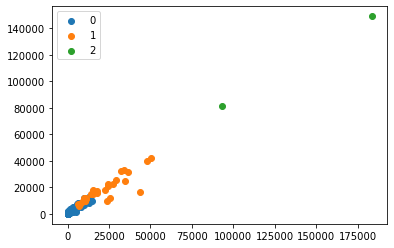

In [61]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans)
 
#plotting the results:
for i in u2_labels:
    plt.scatter(X2.iloc[y_kmeans == i , 0] , X2.iloc[y_kmeans == i , 1], label = i)


plt.legend()
plt.show('cluster1.png')

In [62]:
y2_kmeans

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [63]:
X2['country_clusters']=y2_kmeans

/var/folders/vk/88yqcc115qj_9db2kfg_fqhr0000gn/T/ipykernel_5560/978545335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['country_clusters']=y2_kmeans


In [64]:
X2.head()

,exports,imports,gdpp,health,income,life_expec,country_clusters
0,55.30,248.297,553,41.9174,1610,56.2,0
1,1145.20,1987.740,4090,267.8950,9930,76.3,0
2,1712.64,1400.440,4460,185.9820,12900,76.5,0
3,2199.19,1514.370,3530,100.6050,5900,60.1,0
4,5551.00,7185.800,12200,735.6600,19100,76.8,0


In [65]:
X2['c'] = df.country

/var/folders/vk/88yqcc115qj_9db2kfg_fqhr0000gn/T/ipykernel_5560/3676491587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['c'] = df.country


In [66]:
group1 = X2.loc[X2.country_clusters==0]

In [67]:
group1['c'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR', 

In [68]:
group2 = X2.loc[X2.country_clusters==1]

In [69]:
group2['c'].unique()

array(['Luxembourg', 'Singapore'], dtype=object)

In [70]:
group3 = X2.loc[X2.country_clusters==2]

In [71]:
group3['c'].unique()

array(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kuwait', 'Malta', 'Netherlands', 'New Zealand',
       'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

In [72]:
X2['country_clusters'].value_counts()

0    129
2     36
1      2
Name: country_clusters, dtype: int64

In [73]:
X2.groupby(['country_clusters']).mean()

,exports,imports,gdpp,health,income,life_expec
country_clusters,,,,,,
0,2025.730601,2140.553505,4536.542636,293.326474,8764.054264,67.81938
1,138475.000000,115092.000000,75800.000000,5001.930000,81900.000000,82.00000
2,19471.502778,16498.316667,39672.222222,3573.096389,43577.777778,79.72500


In [74]:
X4 = df[['child_mort','exports', 'imports', 'gdpp', 'health', 'income', 'inflation', 'life_expec', 'total_fer']]

In [75]:
scaler = preprocessing.StandardScaler()
standard_df3 = scaler.fit_transform(X4)
standard_df3 = pd.DataFrame(standard_df3, columns =['child_mort','exports', 'imports', 'gdpp', 'health', 'income', 'inflation', 'life_expec', 'total_fer'])

In [76]:
#run the Kmeans algorithm for the data X:
kmeans.fit(standard_df3)

KMeans(n_clusters=3)

In [77]:
#predict which cluster each data point X belongs to:
y4_kmeans = kmeans.predict(standard_df3)

In [78]:
centers4 = kmeans.cluster_centers_
#print(centers)
print(centers4)

[[ 1.32661038 -0.36504233 -0.39281661 -0.60496339 -0.52444743 -0.68923797
   0.39181237 -1.27627565  1.3543418 ]
 [-0.82629395  1.31794823  1.3111162   1.92353171  1.82094465  1.71870094
  -0.45233422  1.12317044 -0.78661849]
 [-0.44550624 -0.21297273 -0.1962204  -0.27275434 -0.28365905 -0.16527697
  -0.0674905   0.32760944 -0.47234163]]


In [79]:
u4_labels = np.unique(y4_kmeans)

In [80]:
for i in u2_labels:
    print(i)

0
1
2


In [81]:
X4['country_clusters']=y4_kmeans

/var/folders/vk/88yqcc115qj_9db2kfg_fqhr0000gn/T/ipykernel_5560/523631890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['country_clusters']=y4_kmeans


In [82]:
X4['c'] = df.country

In [83]:
X4['country_clusters'].value_counts()

2    91
0    48
1    28
Name: country_clusters, dtype: int64

In [84]:
grp1 = X4.loc[X4.country_clusters==0]

In [85]:
grp1['c'].unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [86]:
grp2 = X4.loc[X4.country_clusters==1]

In [87]:
grp2['c'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Qatar', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [88]:
grp3 = X4.loc[X4.country_clusters==2]

In [89]:
grp3['c'].unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Israel', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Sl

In [92]:
X4.groupby(['country_clusters']).mean()

,child_mort,exports,imports,gdpp,health,income,inflation,life_expec,total_fer
country_clusters,,,,,,,,,
0,91.610417,879.063521,827.028771,1909.208333,114.821765,3897.354167,11.911146,59.239583,4.992083
1,5.046429,31038.239286,25818.100000,48114.285714,4327.163214,50178.571429,3.014679,80.514286,1.760714
2,20.357143,3604.149434,3710.446386,7979.912088,547.279455,13968.021978,7.070549,73.460440,2.235055


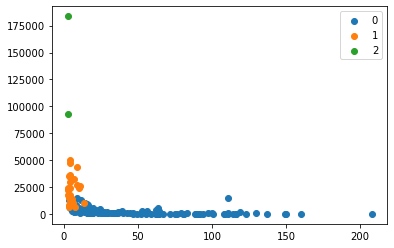

In [90]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y4_kmeans)
 
#plotting the results:
for i in u2_labels:
    plt.scatter(X4.iloc[y_kmeans == i , 0] , X4.iloc[y_kmeans == i , 1], label = i)


plt.legend()
plt.show('cluster2.png')

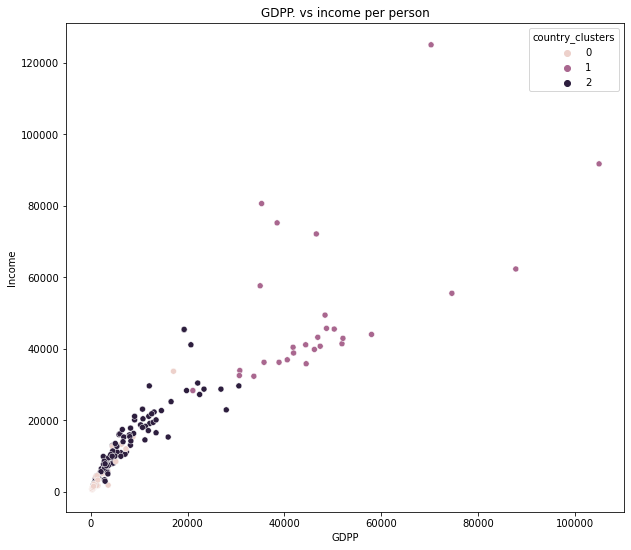

In [91]:
#visuaizing all clusters
fig= plt.figure(figsize= (10,9))
sns.scatterplot(x='gdpp',y='income',hue='country_clusters',legend='full',data=X4)
plt.xlabel('GDPP',fontsize=10)
plt.ylabel('Income',fontsize=10)
plt.title('GDPP. vs income per person')
plt.show()
